## Multivariable model

**Prepare full model**

In [1]:
rm(list=ls())
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/")

sampleInfo<-read.table("BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/Dataset_for_lasso_regression.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]

loh<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/LOH_status.txt",sep="\t",header=T)

sampleInfo<-merge(sampleInfo,loh,by="Sample")
sampleInfo$HRDeficient<-ifelse(sampleInfo$HRDetect>0.7,1,0)
print(sampleInfo[1,])

    Sample BRCA1_Germline_SNV BRCA1_Somatic_SNV BRCA1_LOF BRCA2_Germline_SNV
1 AOCS_001                  0                 0         0                  0
  BRCA2_Somatic_SNV BRCA2_LOF BRCA1_INV_SPAN BRCA2_COPY_GAIN
1                 0         0              0               1
  BRCA1status_compound BRCA2status_compound Double_del BRCA1_VST BRCA2_VST
1                 None             Excluded       <NA>  7.910844  8.807342
  BARD1_VST RAD50_VST  NBN_VST MRE11_VST RAD51B_VST RAD51_VST PALB2_VST
1  9.412187  12.77292 12.15068   11.8641    7.71831  9.613987  9.965007
  RAD51D_VST RAD51C_VST BRIP1_VST BRCA1_pro_meth non_BRCA_Somatic_SNV
1   10.11443   10.35558  8.867105              1                    0
  non_BRCA_Germline_SNV Mutational_load SV_load CNV_load WGD Cellularity
1                     0            7523     301      221   0    0.527623
   HRDetect Cohort BRCA1_LOH BRCA2_LOH HRDeficient
1 0.9994898     AO         1         0           1


In [2]:
sampleInfo[sampleInfo$BRCA1status_compound=="Excluded","BRCA1status_compound"]<-"None"
sampleInfo$BRCA1status_compound<-relevel(as.factor(sampleInfo$BRCA1status_compound),ref="None")

sampleInfo[sampleInfo$BRCA2status_compound=="Excluded","BRCA2status_compound"]<-"None"
sampleInfo$BRCA2status_compound<-relevel(as.factor(sampleInfo$BRCA2status_compound),ref="None")


sampleInfo[is.na(sampleInfo$Double_del),"Double_del"]<-"None"
sampleInfo$Double_del<-relevel(as.factor(sampleInfo$Double_del),ref="None")


sampleInfo$BRCA1_LOH<-relevel(as.factor(sampleInfo$BRCA1_LOH),ref="0")
sampleInfo$BRCA2_LOH<-relevel(as.factor(sampleInfo$BRCA2_LOH),ref="0")



In [3]:
#hr_sv_loads<-read.csv("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/SuppTable_HR_SV_loads_sample_type.csv")
hr_sv_loads<-read.csv("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/SuppTable_HR_SV_loads_sample_type.csv")

hr_sv_loads[is.na(hr_sv_loads$Large_consensus_DEL),"Large_consensus_DEL"]<-0
hr_sv_loads$hr_largedel_pres<-ifelse(hr_sv_loads$Large_consensus_DEL==0,1,0)
hr_sv_loads<-hr_sv_loads[,c("Sample","hr_largedel_pres","Large_consensus_DEL")]

stdVars1<-function(x){
    y<-log(x+1)
    m<-mean(y)
    s<-sd(y)
    stdx<-(y-m)/s
    return(stdx)
}
#hr_sv_loads$Large_consensus_DEL<-stdVars1(hr_sv_loads$Large_consensus_DEL)
stdVars<-function(y){
   
    m<-mean(y)
    s<-sd(y)
    stdx<-(y-m)/s
    return(stdx)
}


In [4]:
#hr_snv_loads<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/nonBRCAHR_SNV_loads.txt")
hr_snv_loads<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Supplementary_tables/nonBRCAHR_SNV_loads.txt")

colnames(hr_snv_loads)<-c("nonBRCA_SNV_load","Sample")

hr_loads<-merge(hr_sv_loads,hr_snv_loads,by="Sample",all.x=T)
hr_loads[is.na(hr_loads$nonBRCA_SNV_load),"nonBRCA_SNV_load"]<-0
#hr_loads$nonBRCA_SNV_load<-stdVars1(hr_loads$nonBRCA_SNV_load)

sampleInfo2<-merge(sampleInfo,hr_loads,by="Sample")
rownames(sampleInfo2)<-as.character(sampleInfo2$Sample)

In [5]:
print(sampleInfo2[1,])
dim(sampleInfo2)
#write.table(sampleInfo2,file="/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Tables/Tables_forpaper/Final_Tables/SuppTable9_input_to_lasso_regression.txt",sep="\t",quote=F,row.names=F)

           Sample BRCA1_Germline_SNV BRCA1_Somatic_SNV BRCA1_LOF
AOCS_001 AOCS_001                  0                 0         0
         BRCA2_Germline_SNV BRCA2_Somatic_SNV BRCA2_LOF BRCA1_INV_SPAN
AOCS_001                  0                 0         0              0
         BRCA2_COPY_GAIN BRCA1status_compound BRCA2status_compound Double_del
AOCS_001               1                 None                 None       None
         BRCA1_VST BRCA2_VST BARD1_VST RAD50_VST  NBN_VST MRE11_VST RAD51B_VST
AOCS_001  7.910844  8.807342  9.412187  12.77292 12.15068   11.8641    7.71831
         RAD51_VST PALB2_VST RAD51D_VST RAD51C_VST BRIP1_VST BRCA1_pro_meth
AOCS_001  9.613987  9.965007   10.11443   10.35558  8.867105              1
         non_BRCA_Somatic_SNV non_BRCA_Germline_SNV Mutational_load SV_load
AOCS_001                    0                     0            7523     301
         CNV_load WGD Cellularity  HRDetect Cohort BRCA1_LOH BRCA2_LOH
AOCS_001      221   0    0.527623 0.999

[1] 150  40

In [6]:


#sampleInfo_analysis<-sampleInfo2[,c(2:12,58,25:27,31,37,38:56,59,60,57)]

sampleInfo_analysis<-sampleInfo2[,c("BRCA1_Germline_SNV",'BRCA1_Somatic_SNV',
                            'BRCA1_LOF', 'BRCA2_Germline_SNV', 'BRCA2_Somatic_SNV', 'BRCA2_LOF','BRCA1_LOH','BRCA2_LOH',
                            'BRCA1_INV_SPAN', 'BRCA2_COPY_GAIN', 'BRCA1status_compound', 'BRCA2status_compound',
                            'Double_del','BRCA1_pro_meth', 'non_BRCA_Somatic_SNV', 'non_BRCA_Germline_SNV',
                            'Mutational_load', 'SV_load', 'CNV_load', 
                            'hr_largedel_pres', 'Large_consensus_DEL', 'nonBRCA_SNV_load',
                            'WGD', 
                            'Cellularity',"Cohort",
                            'BRCA1_VST','BRCA2_VST',
                            'HRDeficient'

)]
rownames(sampleInfo_analysis)<-as.character(sampleInfo2$Sample)

In [7]:
sampleInfo_analysis[sampleInfo_analysis$BRCA1status_compound=="SNV + deletions (both genes)",
 "BRCA1status_compound"]<-"SNV + deletion (same gene)"
sampleInfo_analysis[sampleInfo_analysis$BRCA1status_compound=="SNV + deletion (other gene)",
 "BRCA1status_compound"]<-"None"
sampleInfo_analysis[sampleInfo_analysis$BRCA2status_compound=="SNV + deletions (both genes)",
 "BRCA2status_compound"]<-"SNV + deletion (same gene)"
sampleInfo_analysis[sampleInfo_analysis$BRCA2status_compound=="SNV + deletion (other gene)",
 "BRCA2status_compound"]<-"None"

sampleInfo_analysis[,c(1:16,20,23,25)]<-apply(sampleInfo_analysis[,c(1:16,20,23,25)],2,as.factor)
sampleInfo_analysis$Double_del<-relevel(as.factor(sampleInfo_analysis$Double_del),ref="None")
sampleInfo_analysis$Cohort<-relevel(as.factor(sampleInfo_analysis$Cohort),ref="AO")

## Prepare differential expression 

In [8]:
#Load HRDef and HRprof
#hrdef<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SHGSOC_withBRCASNVs.txt",sep="\t")
hrdef<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SHGSOC_withBRCASNVs.txt",sep="\t")
hrdef<-as.character(hrdef[,1])
#hrprof<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/Likely_HRproficient_samples.txt",sep="\t")
hrprof<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/Likely_HRproficient_samples.txt",sep="\t")
hrprof<-as.character(hrprof[,1])

In [9]:

length(hrdef)
length(hrprof)

[1] 50

[1] 47

In [10]:
library(tximport)
setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC")
require(DESeq2)

Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching p

In [68]:
files_scot<-dir("../../alignments/SHGSOC/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)

files_scot_additional<-dir("../../bcbio/SHGSOC/2019-2-26",pattern="quant.sf",recursive = T,full.names = TRUE)

scot1<-sapply(strsplit(files_scot,'/'),function(x) x[[6]])
scot2<-sapply(strsplit(files_scot_additional,'/'),function(x) x[[6]])

all_scot<-c(scot1,scot2)
write.table(all_scot, file="~/Desktop/SHGSOC_RNAseq_samples.txt",sep="\t",row.names=F,col.names=F,quote=F)

In [38]:
#Load all salmon quantification files for three cohorts
files_scot<-dir("../../alignments/SHGSOC/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_scot_additional<-dir("../../bcbio/SHGSOC/2019-2-26",pattern="quant.sf",recursive = T,full.names = TRUE)
files_aocs<-dir("../AOCS/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_tcga<-dir("../../bcbio/TCGA_US_OV/TCGAvirtualproj",pattern="quant.sf",recursive = T,full.names = TRUE)
files<-c(files_scot,files_scot_additional,files_aocs,files_tcga)

rna_reps_to_exclude<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/RNAseq_replicates_forexclusion.txt",sep="\t")
rna_reps_to_exclude<-as.character(rna_reps_to_exclude[,1])

new_files_orig<-setdiff(files,rna_reps_to_exclude)
tx2knownGene <- read.csv("tx2gene.csv",header = F)

names(new_files_orig)[1:37]<-do.call("cbind",strsplit(new_files_orig[1:37],split = "[/.]"))[10,]
names(new_files_orig)[38:42]<-do.call("cbind",strsplit(new_files_orig[38:42],split = "[/.]"))[10,]
names(new_files_orig)[43:122]<-do.call("cbind",strsplit(new_files_orig[43:122],split = "[/.]"))[6,]
names(new_files_orig)[123:152]<-do.call("cbind",strsplit(new_files_orig[123:152],split = "[/.]"))[10,]

txi.salmon <- tximport(new_files_orig, type = "salmon", tx2gene = tx2knownGene)

reading in files with read_tsv
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 
summarizing abundance
summarizing counts
summarizing length


In [11]:
load("~/Desktop/txi.salmon2.130220.RData")

In [23]:
sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample

rna_sampleids<-colnames(head(txi.salmon2$counts))
rna_short_sampleids<-rep(NA,length(rna_sampleids))
rna_short_sampleids[1:42]<-substr(rna_sampleids[1:42],1,9)
rna_short_sampleids[43:122]<-substr(rna_sampleids[43:122],1,8)
rna_short_sampleids[123:152]<-substr(rna_sampleids[123:152],1,7)
rna<-data.frame(RNA_sample=rna_sampleids,Sample=rna_short_sampleids)
rna<-rna[as.character(rna$Sample) %in% as.character(sample_expr$Sample),]

new_files<-new_files_orig[as.character(rna$RNA_sample)]

txi.salmon2 <- tximport(new_files, type = "salmon", tx2gene = tx2knownGene)

ERROR: Error in data.frame(RNA_sample = rna_sampleids, Sample = rna_short_sampleids): arguments imply differing number of rows: 150, 152


In [32]:
#Corona version
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample
load("~/Desktop/txi.salmon2.130220.RData")

rna_sampleids<-colnames(head(txi.salmon2$counts))
rna_short_sampleids<-rep(NA,length(rna_sampleids))
rna_short_sampleids[1:40]<-substr(rna_sampleids[1:40],1,9)
rna_short_sampleids[41:120]<-substr(rna_sampleids[41:120],1,8)
rna_short_sampleids[121:150]<-substr(rna_sampleids[121:150],1,7)
rna<-data.frame(RNA_sample=rna_sampleids,Sample=rna_short_sampleids)
rna<-rna[as.character(rna$Sample) %in% as.character(sample_expr$Sample),]



In [33]:
coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
coldata$HRDtruth<-"Excluded"
coldata[(coldata$Sample %in% hrdef),"HRDtruth"]<-"HRDef"
coldata[(coldata$Sample %in% hrprof),"HRDtruth"]<-"HRProf"
table(coldata$HRDtruth)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

rownames(coldata)<-as.character(coldata$RNA_sample)

coldata[is.na(coldata$BRCA1status),"BRCA1status"]<-"Excluded"
coldata[is.na(coldata$BRCA2status),"BRCA2status"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]


coldata$condition<-factor(coldata$HRDtruth)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)

dds_correct <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~as.factor(Cohort)+Purity)  
dds_correct <- DESeq(dds_correct)
vsd <- vst(dds_correct , blind=FALSE)

sampleInfo_analysis[sampleInfo_analysis$HRDeficient=='1',"HRDeficient"]<-
                    "HRD"
sampleInfo_analysis[sampleInfo_analysis$HRDeficient=='0',"HRDeficient"]<-
                    "HRP"
sampleInfo_analysis$HRDeficient<-as.factor(sampleInfo_analysis$HRDeficient)
sampleInfo_analysis$HRDeficient<-relevel(as.factor(sampleInfo_analysis$HRDeficient),ref="HRP")


Excluded    HRDef   HRProf 
      74       42       34 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport
Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”using counts and average transcript lengths from tximport
estimating size factors
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [15]:
save.image(file="~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/Robjecttosetup_multivariablemodel_full.RData")

In [30]:
#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample[is.na(sample$BRCA1_VST)==FALSE,]
table(sample_expr$Cohort)


AO DO SH 
80 30 40 

** Prepare reduced genomic model**

In [37]:
rm(list=ls())
#setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/")
sampleInfo<-read.table("BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/Dataset_for_elastic_regression_genomic.txt",sep="\t",header=T,stringsAsFactors=F)
rownames(sampleInfo)<-sampleInfo[,1]
loh<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/LOH_status.txt",sep="\t",header=T)

sampleInfo<-merge(sampleInfo,loh,by="Sample")
sampleInfo$HRDeficient<-ifelse(sampleInfo$HRDetect>0.7,1,0)

In [38]:
sampleInfo[sampleInfo$BRCA1status_compound=="Excluded","BRCA1status_compound"]<-"None"
sampleInfo$BRCA1status_compound<-relevel(as.factor(sampleInfo$BRCA1status_compound),ref="None")

sampleInfo[sampleInfo$BRCA2status_compound=="Excluded","BRCA2status_compound"]<-"None"
sampleInfo$BRCA2status_compound<-relevel(as.factor(sampleInfo$BRCA2status_compound),ref="None")


sampleInfo[is.na(sampleInfo$Double_del),"Double_del"]<-"None"
sampleInfo$Double_del<-relevel(as.factor(sampleInfo$Double_del),ref="None")

sampleInfo$BRCA1_LOH<-relevel(as.factor(sampleInfo$BRCA1_LOH),ref="0")
sampleInfo$BRCA2_LOH<-relevel(as.factor(sampleInfo$BRCA2_LOH),ref="0")

In [39]:
sampleInfo_analysis<-sampleInfo[,c("BRCA1_Germline_SNV",'BRCA1_Somatic_SNV',
                            'BRCA1_LOF', 'BRCA2_Germline_SNV', 'BRCA2_Somatic_SNV', 'BRCA2_LOF',
                            'BRCA1_INV_SPAN', 'BRCA2_COPY_GAIN', 'BRCA1status_compound', 'BRCA2status_compound',
                            'Double_del','BRCA1_pro_meth','BRCA1_LOH','BRCA2_LOH',
                            'Mutational_load', 'SV_load', 'CNV_load', 'WGD', 
                            'Cellularity',"Cohort",
                            'HRDeficient'

)]
rownames(sampleInfo_analysis)<-as.character(sampleInfo$Sample)

In [40]:
sampleInfo_analysis[sampleInfo_analysis$BRCA1status_compound=="SNV + deletions (both genes)",
 "BRCA1status_compound"]<-"SNV + deletion (same gene)"
sampleInfo_analysis[sampleInfo_analysis$BRCA1status_compound=="SNV + deletion (other gene)",
 "BRCA1status_compound"]<-"None"
sampleInfo_analysis[sampleInfo_analysis$BRCA2status_compound=="SNV + deletions (both genes)",
 "BRCA2status_compound"]<-"SNV + deletion (same gene)"
sampleInfo_analysis[sampleInfo_analysis$BRCA2status_compound=="SNV + deletion (other gene)",
 "BRCA2status_compound"]<-"None"

sampleInfo_analysis[,c(1:14,18,20,21)]<-apply(sampleInfo_analysis[,c(1:14,18,20,21)],2,as.factor)
sampleInfo_analysis$Double_del<-relevel(as.factor(sampleInfo_analysis$Double_del),ref="None")
sampleInfo_analysis$Cohort<-relevel(as.factor(sampleInfo_analysis$Cohort),ref="AO")

sampleInfo_analysis[sampleInfo_analysis$HRDeficient=='1',"HRDeficient"]<-
                    "HRD"
sampleInfo_analysis[sampleInfo_analysis$HRDeficient=='0',"HRDeficient"]<-
                    "HRP"
sampleInfo_analysis$HRDeficient<-as.factor(sampleInfo_analysis$HRDeficient)
sampleInfo_analysis$HRDeficient<-relevel(as.factor(sampleInfo_analysis$HRDeficient),ref="HRP")

In [41]:
save.image(file="~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/Robjecttosetup_reducedmultivariablemodel.RData")

## Full model with expression N=150

In [19]:
features<-c(BRCA1_Germline_SNV1="BRCA1 germline SNV",
            HRD_DE_sig="HRD expression signature",
            `BRCA2status_compoundSNV + deletion (same gene)`="\nBRCA2 SNV and deletion\nat same gene\n",
            BRCA1_pro_meth1="BRCA1 promoter methylation",
            SNV_load="SNV load",
            BRCA1_Somatic_SNV1="BRCA1 somatic SNV",
            `Double_delDouble deletion`="Double deletion",
            BRCA2_Germline_SNV1="BRCA2 germline SNV",
            CNV_load="Large CNV load",
            BRCA2_Somatic_SNV1="BRCA2 somatic SNV",
            BRCA1_VST="BRCA1 expression",
            BRCA1_INV_SPAN1="BRCA1 inversion",
            BRCA2_LOF1="BRCA2 deletion",
            CohortDO="Cohort - TCGA",
            CohortSH="Cohort - SHGSOC",
            Mutational_load="SNV load",
            `BRCA1status_compoundSNV + deletion (same gene)`="BRCA1 SNV + deletion\nat same gene",
            BRCA2_COPY_GAIN1="BRCA2 copy gain",
            BRCA1_LOF1="BRCA1 deletion",
            hr_largedel_pres1="Presence of large deletion at HR gene",
            SV_load="SV load",
            WGD1="Whole genome doubling",
            Cellularity="Tumour cellularity",
            nonBRCA_SNV_load="SNV load at HR genes",
            Large_consensus_DEL="Large deletion load at HR genes",
            non_BRCA_Somatic_SNV1="Somatic SNV at HR gene",
            non_BRCA_Germline_SNV1="Germline SNV at HR gene",
            BRCA2_VST="BRCA2 expression",
            BRCA1_LOH1="BRCA1 LOH",
            BRCA2_LOH1="BRCA2 LOH"
           )

In [24]:
#Build DE sig and fit elastic net on 50 different training sets
load("~/Desktop/df_1_50_loh_full_names.RData")
s<-apply(df2[,-1],1,function(x) sum(x==0))
df2<-df2[s!=100 & df2$Feature!="(Intercept)",]  
feature_medians<-apply(df2[,-1],1,median)
feature_medians_abs<-apply(df2[,-1],1,function(x) abs(median(x)))
    
col<-character(length(feature_medians_abs))
col<- ifelse(feature_medians_abs>0,"red","black")
df2<-data.frame(df2,Col=col)
    
feature_medians<-data.frame(Feature=df2$Feature,Median=feature_medians)

feature_medians$Median<-as.numeric(as.character(feature_medians$Median))
feat_ord<-feature_medians[order(feature_medians$Median,decreasing=T),"Feature"]





In [25]:
library(reshape)
library(ggplot2)
long.df2<-melt(df2,id.vars=c("Feature","Col"))
long.df2[1,]
long.df2$Feature<-factor(long.df2$Feature,levels=rev(feat_ord))
options(repr.plot.width=10)
gg_stab<-ggplot(long.df2,aes(x=Feature,y=value,colour=Col))+geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+coord_flip()+theme_bw()+
scale_x_discrete(labels=features)+ylab("Effect size (log odds)")+scale_colour_manual(values=c("black","red"))+
theme(legend.position="None")+
ylim(-4,4)

Feature,Col,variable,value
<fct>,<fct>,<fct>,<dbl>
BRCA1_Germline_SNV1,red,X1,0.5037177


In [26]:
feature_medians<-feature_medians[feature_medians$Median!=0,]

feature_medians$Feature<-factor(feature_medians$Feature,levels=feature_medians[order(feature_medians$Median,decreasing=F),"Feature"])

                          
options(repr.plot.height=7,repr.plot.width=6)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/ElasticNet_forest_plot.png",
   # width=6,height=7,unit="in",res=300)
gg_median<-ggplot(feature_medians,aes(x=Feature,y=Median))+
#geom_bar(stat="identity",fill=rev(myColors),alpha=0.4,col=rev(myColors))+
geom_bar(stat="identity",alpha=0.4)+
coord_flip()+
theme_bw()+ylab("Median effect size (log odds)")+

scale_x_discrete(labels=features)
#dev.off()

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

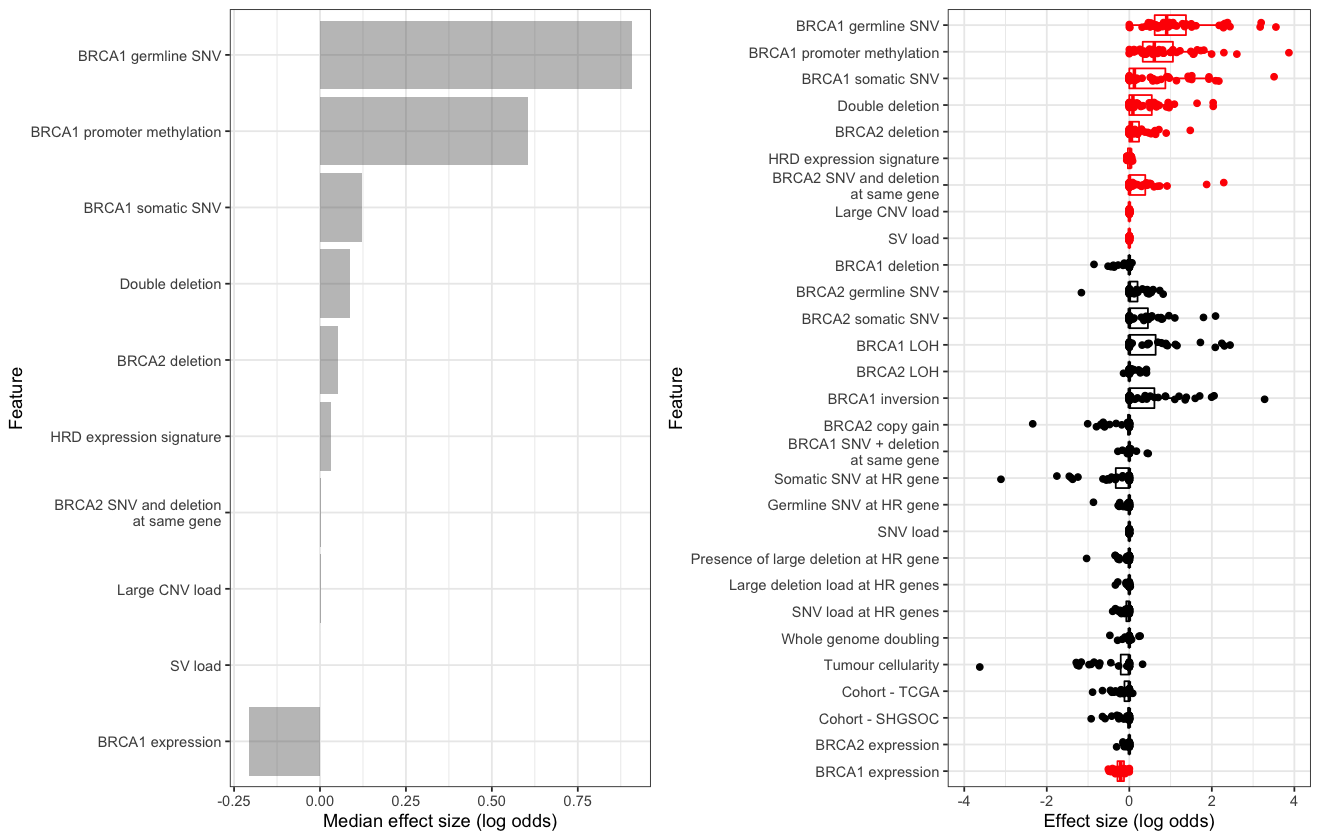

In [31]:
library(gridExtra)
options(repr.plot.height=7,repr.plot.width=11)
#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/ElasticNet_forest_plot_stability_full.png",
   # width=11,height=7,unit="in",res=300)
grid.arrange(gg_median,gg_stab,nrow=1)
#dev.off()

## Genomic modelling on larger dataset - maximise power

In [1]:
load("~/Desktop/reduced_df_1_100_loh.RData")
s<-apply(df2[,-1],1,function(x) sum(x==0))
df2<-df2[s!=100 & df2$Feature!="(Intercept)",]  
feature_medians<-apply(df2[,-1],1,median)
feature_medians_abs<-apply(df2[,-1],1,function(x) abs(median(x)))
    
col<-character(length(feature_medians_abs))
col<- ifelse(feature_medians_abs>0,"red","black")
df2<-data.frame(df2,Col=col)
    
feature_medians<-data.frame(Feature=df2$Feature,Median=feature_medians)

feature_medians$Median<-as.numeric(as.character(feature_medians$Median))
feat_ord<-feature_medians[order(feature_medians$Median,decreasing=T),"Feature"]

In [4]:
library(reshape)
library(ggplot2)
long.df2<-melt(df2,id.vars=c("Feature","Col"))
long.df2[1,]
long.df2$Feature<-factor(long.df2$Feature,levels=rev(feat_ord))
options(repr.plot.width=10)
gg_stab<-ggplot(long.df2,aes(x=Feature,y=value,colour=Col))+geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+coord_flip()+theme_bw()+
scale_x_discrete(labels=features)+ylab("Effect size (log odds)")+scale_colour_manual(values=c("black","red"))+
theme(legend.position="None")+
ylim(-4,4)

Feature,Col,variable,value
<fct>,<fct>,<fct>,<dbl>
BRCA1_Germline_SNV1,red,X1,1.461412


In [5]:
feature_medians<-feature_medians[feature_medians$Median!=0,]

feature_medians$Feature<-factor(feature_medians$Feature,levels=feature_medians[order(feature_medians$Median,decreasing=F),"Feature"])

                          
options(repr.plot.height=7,repr.plot.width=6)
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/ElasticNet_forest_plot.png",
   # width=6,height=7,unit="in",res=300)
gg_median<-ggplot(feature_medians,aes(x=Feature,y=Median))+
#geom_bar(stat="identity",fill=rev(myColors),alpha=0.4,col=rev(myColors))+
geom_bar(stat="identity",alpha=0.4)+
coord_flip()+
theme_bw()+ylab("Median effect size (log odds)")+

scale_x_discrete(labels=features)
#dev.off()

Warning message:
“Removed 27 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 27 rows containing missing values (geom_point).”

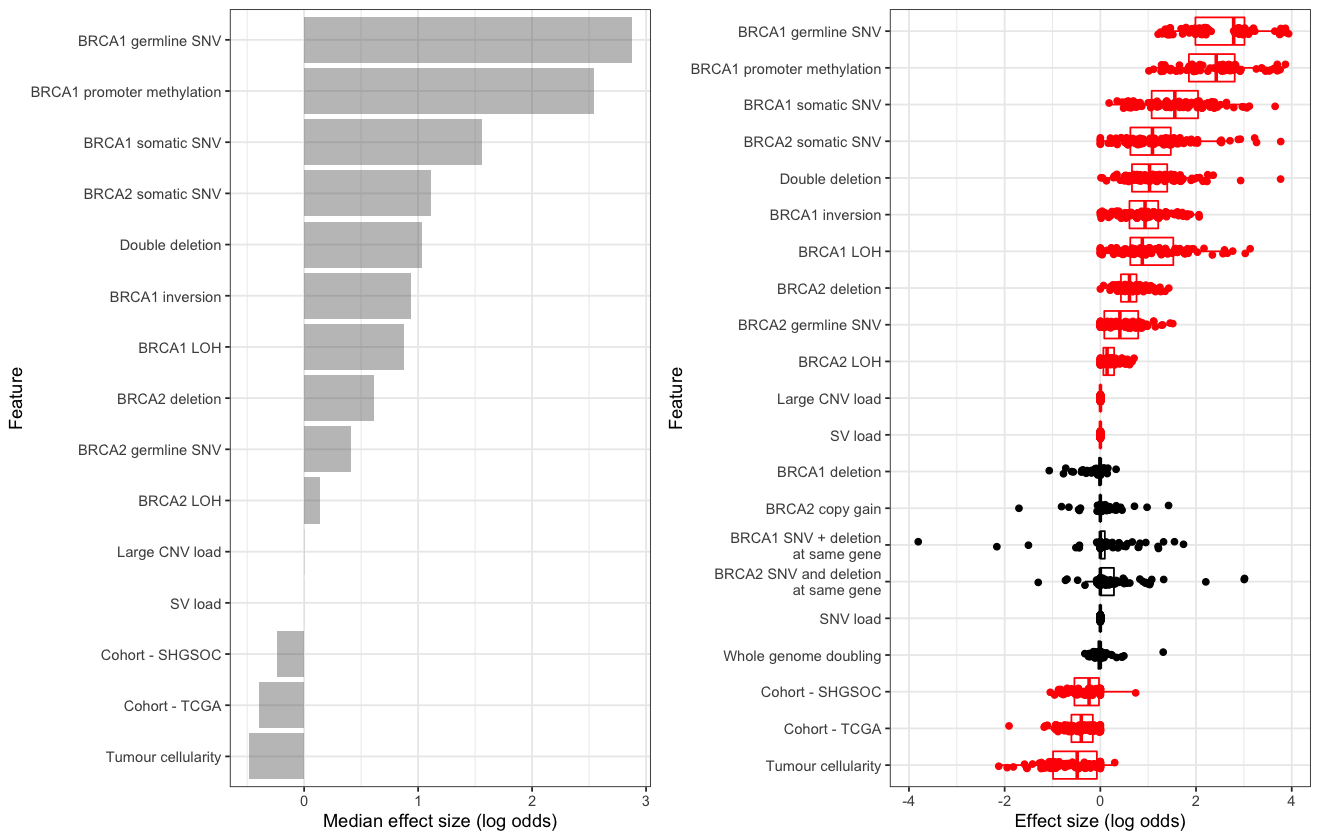

In [13]:
library(gridExtra)
options(repr.plot.height=7,repr.plot.width=11)
#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/ElasticNet_forest_plot_stability_reduced_genomic.png",
    #width=11,height=7,unit="in",res=300)
grid.arrange(gg_median,gg_stab,nrow=1)
#dev.off()

In [10]:
#Performance metrics
perf<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Analysis/Stability /Performance_genomic_elastic_net.txt",header=T,sep="\t",row.names=1)
apply(perf,1,mean)

Accuracy Sensitivity Specificity         AUC 
  0.7419512   0.8201864   0.6947616   0.7478624

## Random forest


In [222]:
set.seed(489)
library(randomForest)



model <- train(
  HRDeficient ~., data = train.data2, method = "ranger",
  trControl = trainControl("cv", number = 10,
                           summaryFunction = twoClassSummary,
                           classProbs = TRUE),
  tuneLength = 10,
  importance = 'permutation'
)

model


Warning message in train.default(x, y, weights = w, ...):
“The metric "Accuracy" was not in the result set. ROC will be used instead.”

Random Forest 

120 samples
 26 predictor
  2 classes: 'HRP', 'HRD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 107, 108, 108, ... 
Resampling results across tuning parameters:

  mtry  splitrule   ROC        Sens       Spec     
   2    gini        0.9003968  0.8800000  0.7880952
   2    extratrees  0.8674603  0.9000000  0.7261905
   4    gini        0.9007937  0.9133333  0.8190476
   4    extratrees  0.8654762  0.9166667  0.7095238
   7    gini        0.8928571  0.8800000  0.8190476
   7    extratrees  0.8699206  0.9000000  0.6928571
  10    gini        0.8966270  0.8966667  0.7857143
  10    extratrees  0.8649206  0.9000000  0.7095238
  13    gini        0.8873016  0.9133333  0.7857143
  13    extratrees  0.8738095  0.9166667  0.7404762
  15    gini        0.8859127  0.8766667  0.7857143
  15    extratrees  0.8682540  0.9000000  0.7571429
  18    gini        0.8817460  0.8966667  0.7857143
  18    extratrees  0.8718651  0.900000

In [223]:
rf_pred <- predict(model, test.data2)
confusionMatrix(rf_pred, as.factor(test.data2$HRDeficient))
colAUC(as.numeric(rf_pred), as.factor(test.data2$HRDeficient))

Confusion Matrix and Statistics

          Reference
Prediction HRP HRD
       HRP   8   4
       HRD   2  16
                                          
               Accuracy : 0.8             
                 95% CI : (0.6143, 0.9229)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.08384         
                                          
                  Kappa : 0.5714          
                                          
 Mcnemar's Test P-Value : 0.68309         
                                          
            Sensitivity : 0.8000          
            Specificity : 0.8000          
         Pos Pred Value : 0.6667          
         Neg Pred Value : 0.8889          
             Prevalence : 0.3333          
         Detection Rate : 0.2667          
   Detection Prevalence : 0.4000          
      Balanced Accuracy : 0.8000          
                                          
       'Positive' Class : HRP             
                              

HRP vs. HRD,0.8


In [224]:
varImp(model)

ranger variable importance

  only 20 most important variables shown (out of 27)

                                               Overall
HRD_DE_sig                                     100.000
Mutational_load                                 29.074
BRCA1_Germline_SNV1                             26.784
BRCA1_VST                                       17.518
SV_load                                         11.986
Large_consensus_DEL                              9.016
CNV_load                                         8.482
BRCA1_pro_meth1                                  5.920
BRCA2_LOF1                                       5.876
BRCA2status_compoundSNV + deletion (same gene)   4.233
BRCA2_Somatic_SNV1                               3.530
Double_delDouble deletion                        3.397
CohortDO                                         3.372
CohortSH                                         3.028
BRCA2_VST                                        2.816
WGD1                                  

In [58]:
save.image(file="~/Desktop/DEsig_model.RData")

In [1]:
load("~/Desktop/DEsig_model.RData")